# Exploratory Data Analysis

## Check Version
Checking the version of which Spark and Python installed is important as it changes very quickly and drastically. Reading the wrong documentation can cause lots of lost time and unnecessary frustration!

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info)

2.4.5-amzn-0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


## Load in the data
Reading in data is the first step to using PySpark for data science! Let's leverage the new industry standard of parquet files!

In [178]:
import pandas as pd
# Read the file into a dataframe
df = pd.read_csv('2017_StPaul_MN_Real_Estate.csv')
# df = spark.createDataFrame(df)
# Print columns in dataframe
print(df.columns)

Index(['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME',
       'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE',
       'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT',
       'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions',
       'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces',
       'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale',
       'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
       'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR',
       'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES',
       'CoolingDescription', 'APPLIANCES', 'backonmarketdate',
       'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2',
       'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull',
       'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL',
       'BATHDESC', 'RoomArea5', 'Room

In [179]:
df = df[['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME',
        'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE',
        'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT',
        'FOUNDATIONSIZE', 'MapLetter',
        'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces',
        'roomtype', 'PotentialShortSale',
        'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
         'Taxes', 'TAXWITHASSESSMENTS', 'TAXYEAR',
        'LivingArea', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES',
        'CoolingDescription', 'backonmarketdate',
         'EXTERIOR',
         'BASEMENT', 'BathsFull',
         'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL',
         'Bedrooms',
       'SQFTBELOWGROUND', 'AssociationFee',
       'ASSESSMENTPENDING', 'AssessedValuation'
        ]]

In [180]:
df = spark.createDataFrame(df)

### What are we predicting?
Which of these fields (or columns) is the value we are trying to predict for?

* `TAXES`
* `SALESCLOSEPRICE`
* `DAYSONMARKET`
* `LISTPRICE`

In [181]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+-----------------+
|summary|  SALESCLOSEPRICE|
+-------+-----------------+
|  count|             5000|
|   mean|      262804.4668|
| stddev|140559.8259199855|
|    min|            48000|
|    max|          1700000|
+-------+-----------------+



### Verifying Data Load
Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

In [184]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
    # Check number of columns
        if num_columns == len(df.columns):
            # Success message
            message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 48))

Validation Passed


### Verifying DataTypes
In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct. In this exercise we will validate a dictionary of attributes and their datatypes to see if they are correct. This dictionary is stored in the variable `validation_dict` and is available in your workspace.

In [190]:
validation_dict = {'SQFTBELOWGROUND': 'bigint', 
 'AssumableMortgage': 'string', 
 'ASSESSMENTPENDING': 'string', 
 'AssessedValuation': 'double', 
 'AssociationFee': 'bigint'}

In [191]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)

[('No.', 'bigint'), ('MLSID', 'string'), ('StreetNumberNumeric', 'bigint'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'bigint'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'bigint'), ('LISTDATE', 'string'), ('LISTPRICE', 'bigint'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'bigint'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'bigint'), ('MapLetter', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'bigint'), ('offmarketdate', 'string'), ('Fireplaces', 'bigint'), ('roomtype', 'string'), ('PotentialShortSale', 'string'), ('PDOM', 'bigint'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'bigint'), ('Taxes', 'bigint'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'bigint'), ('LivingArea', 'bigint'), ('YEARBUILT', 'bigint'), ('ZONING', 'string'), ('STYLE', 'string'), ('ACRES', 'double'), ('CoolingDescription', 'string'), ('backonmarketdate', 'double'), ('EXTERIOR', 'string'), ('BASEMENT', 'string'), ('Ba

In [192]:
# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

SQFTBELOWGROUND has expected dtype.
AssociationFee has expected dtype.
ASSESSMENTPENDING has expected dtype.
AssessedValuation has expected dtype.


## Visually Inspecting Data / EDA


#### Getting Descriptive with DataFrame.describe()

In [198]:
df.describe(['LISTPRICE']).show()

+-------+------------------+
|summary|         LISTPRICE|
+-------+------------------+
|  count|              5000|
|   mean|        263419.365|
| stddev|143944.10818036893|
|    min|             40000|
|    max|           1850000|
+-------+------------------+



#### Descriptive functions

* Mean
`pyspark.sql.functions.mean(col)`
* Skewness
`pyspark.sql.functions.skewness(col)`
* Minimum
`pyspark.sql.functions.min(col)`
* Covariance
`cov(col1, col2)`
* Correlation
`corr(col1, col2)`

### Using Corr()
The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

A list called `columns` containing column names has been created for you. In this exercise you will compute the correlation between those columns and '`SALESCLOSEPRICE'`, and find the maximum.

In [229]:
new_column_names = [f"{c.upper()}" for c in df.columns]
df = df.toDF(*new_column_names)

In [230]:
columns = [
             'FOUNDATIONSIZE',
             'DAYSONMARKET',
             'FIREPLACES',
             'PDOM',
             'SQFTABOVEGROUND',
             'TAXES',
             'TAXWITHASSESSMENTS',
             'TAXYEAR',
             'LIVINGAREA',
             'YEARBUILT',
             'ACRES',
             'BACKONMARKETDATE',
             'BATHSFULL',
             'BATHSHALF',
             'BATHQUARTER',
             'BATHSTHREEQUARTER',
             'BATHSTOTAL',
             'BEDROOMS',
             'SQFTBELOWGROUND',
             'ASSOCIATIONFEE',
             'ASSESSEDVALUATION'
        ]

In [231]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_max < corr_val:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


#### Using Visualizations: distplot
Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the `'LISTPRICE'` variable, and you will gain more insights on its distribution by computing the skewness.

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

* Sample 50% of the dataframe df with `sample()` making sure to not use replacement and setting the random seed to 42.
* Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
* Plot a distribution plot using seaborn's `distplot()` method.
* Import the `skewness()` function from pyspark.sql.functions and compute it on the aggregate of the `'LISTPRICE'` column with the `agg()` method. Remember to `collect()` your result to evaluate the computation.

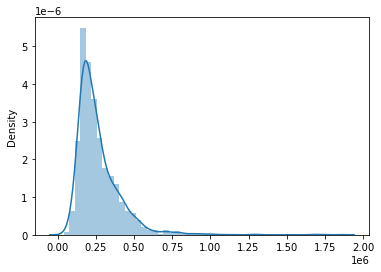

[Row(skewness(LISTPRICE)=2.790448093916568)]


In [236]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

#### Using Visualizations: lmplot
Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

* Using the loaded data set df filter it down to the columns `'SALESCLOSEPRICE'` and `'LIVINGAREA'` with `select()`.
* Sample 50% of the dataframe with `sample()` making sure to not use replacement and setting the random seed to 42.
* Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
* Using `'SALESCLOSEPRICE'` as your dependent variable and `'LIVINGAREA'` as your independent, plot a linear model plot using seaborn `lmplot()`.

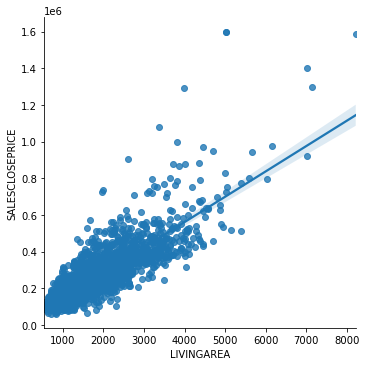

In [237]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()

# Wrangling with Spark Functions

## Dropping data


### Dropping a list of columns
Our data set is rich with a lot of features, but not all are valuable. We have many that are going to be hard to wrangle into anything useful. For now, let's remove any columns that aren't immediately useful by dropping them.

* `'STREETNUMBERNUMERIC'`: The postal address number on the home
* `'FIREPLACES'`: Number of Fireplaces in the home
* `'LOTSIZEDIMENSIONS'`: Free text describing the lot shape
* `'LISTTYPE'`: Set list of values of sale type
* `'ACRES'`: Numeric area of lot size

Read the list of column descriptions above and explore their top 30 values with `show()`

In [248]:
# Show top 30 records
df.select('STREETNUMBERNUMERIC', 'FIREPLACES', 'LISTTYPE', 'ACRES').show(30)

+-------------------+----------+---------------+------------------+
|STREETNUMBERNUMERIC|FIREPLACES|       LISTTYPE|             ACRES|
+-------------------+----------+---------------+------------------+
|              11511|         0|Exclusive Right|              1.28|
|              11200|         0|Exclusive Right|              0.32|
|               8583|         0|Exclusive Right|0.8220000000000001|
|               9350|         1|Exclusive Right|              0.94|
|               2915|         1|Exclusive Right|               0.0|
|               3604|         1|Exclusive Right|             0.172|
|               9957|         0|Exclusive Right|              0.05|
|               9934|         0|Exclusive Right|              0.05|
|               9926|         0|Exclusive Right|              0.05|
|               9928|         0|Exclusive Right|              0.05|
|               9902|         0|Exclusive Right|              0.05|
|               9904|         0|Exclusive Right|

Create a list of columns to drop based on their lack of relevance to predicting house prices called cols_to_drop

In [250]:
# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC']

In [251]:
# Drop columns in list
df = df.drop(*cols_to_drop)

### Using text filters to remove records
It pays to have to ask your clients lots of questions and take time to understand your variables. You find out that Assumable mortgage is an unusual occurrence in the real estate industry and your client suggests you exclude them. In this exercise we will use `isin()` which is similar to `like()` but allows us to pass a list of values to use as a filter rather than a single one.

* Use `select()` and `show()` to inspect the distinct values in the column `'ASSUMABLEMORTGAGE'` and create the list yes_values for all the values containing the string 'Yes'.

In [ ]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

In [ ]:
# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

In [ ]:
# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

In [ ]:
# Print count of remaining records
print(df.count())

### Filtering numeric fields conditionally
Again, understanding the context of your data is extremely important. We want to understand what a normal range of houses sell for. Let's make sure we exclude any outlier homes that have sold for significantly more or less than the average. Here we will calculate the mean and standard deviation and use them to filer the near normal field `log_SalesClosePrice`.

In [254]:
df.select('SALESCLOSEPRICE').show()

+---------------+
|SALESCLOSEPRICE|
+---------------+
|         143000|
|         190000|
|         225000|
|         265000|
|         249900|
|         255000|
|         248000|
|         245000|
|         254990|
|         250000|
|         254500|
|         253000|
|         257500|
|         272990|
|         290000|
|         274000|
|         274990|
|         274000|
|         282000|
|         280617|
+---------------+
only showing top 20 rows



In [258]:
from pyspark.sql.functions import log
df = df.withColumn('LOG_SALESCLOSEPRICE', log('SALESCLOSEPRICE'))

In [260]:
df.select('LOG_SALESCLOSEPRICE').show()

+-------------------+
|LOG_SALESCLOSEPRICE|
+-------------------+
| 11.870599909242044|
| 12.154779351142624|
| 12.323855681186558|
| 12.487485104968359|
| 12.428816116823043|
| 12.449018824140563|
| 12.421184025147118|
| 12.409013489526863|
| 12.448979607685333|
| 12.429216196844383|
| 12.447056114972714|
| 12.441144767709657|
| 12.458774999085929|
|  12.51719044345957|
| 12.577636201962656|
| 12.520883385370206|
|  12.52449001235117|
| 12.520883385370206|
|  12.54966234992025|
| 12.544746029277201|
+-------------------+
only showing top 20 rows



In [259]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'LOG_SALESCLOSEPRICE': 'mean'}).collect()[0][0]
stddev_val = df.agg({'LOG_SALESCLOSEPRICE': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['LOG_SALESCLOSEPRICE'] < hi_bound) & (df['LOG_SALESCLOSEPRICE'] > low_bound))